# Part I: Research Question
## A. Purpose of Data Mining Report
### A1. Research Question
Can Principal Component Analysis be used to reduce the dimensionality of the Churn data set to determine which Principal Components contribute to 80% of the variance in the data?

### A2. Goal of the Data Analysis
The goal of performing Principal Component Analysis on the churn data set is to reduce the dimensionality of the data, retaining only the most significant Principal Components. By reducing the dimensionality of the data set, we can improve computational efficiency and uncover insights in the variability of the data.

# Part II: Method Justification
## B. Reasons for using PCA
### B1. How PCA Analyzes the Data Set

Principal Component Analysis, or PCA, is a means of dimensionality reduction that takes the variables of a data set and returns a transformed set of uncorrelated variables, or principal components. 

Steps to Perform PCA:

1. Standardize Continuous Initial Variables
    - Since PCA is sensitive to the variances of initial variables, it is imperative to standardize them such that they are on the same scale.
2. Compute Covariance Matrix 
    - Computing the covariance matrix can assist in identifying correlations in the features.
    - If the sign of the covariance is positive, the two variables are correlated, or increase/decrease together.
    - If the sign of the covariance is negative, the two variables are inversely correlated, or one increases as the other decreases.
    - The covariance matrix, $\Sigma$, is computed using the formula below, where $X$ is the original matrix.
    $$ \Sigma = \frac{1}{n-1} \cdot X^T_{standardized} \cdot X_{standardized} $$
3. Compute Eigenvectors and Eigenvalues
    - The eigenvectors and eigenvalues of the covariance matrix are computed in order to identify the principal components.
    - Eigenvectors, which are the principal components, represent the direction of the maximum variance.
    - Eigenvalues, or the coefficients of the eigenvectors, represent the amount of variance in each principal component.
4. Select Principal Components
    - Ordering the eigenvalues in descending order ranks them by significance.
    - The highest ranking principal components capture the most variance in the data and are retained.
    - The Feature Vector is formed, which has as its columns the retained components.
5. Transform the Data
    - Using the Feature Vector, $F$, the data is transformed from the original axes to those represented by the principal components
    - The newly transformed data set, $N$, is found using the formula below.
    $$ N = F^T \cdot X^T_{standardized} $$
    
(Jaadi, 2024)

### B2. Assumptions of PCA
1. PCA assumes a correlation between features
2. PCA is sensitive to the scale of features
3. PCA is not robust against outliers
4. PCA assumes a linear relationship between features
5. PCA assumes no missing values

(Keboola, 2022)

# Part III: Data Preparation
## C. Data Preparation
### C1. Continuous Data Set Variables
| Variable | Continuous/Categorical |
| -------- | -------- | 
| Income | Continuous |
| Age | Continuous |
| Outage_sec_perweek | Continuous |
| Tenure | Continuous |
| MonthlyCharge | Continuous |
| Bandwidth_GB_Year | Continuous |

### C2. Standardization of the Continuous Variables
`StandardScaler` was chosen to scale the variables. The code to scale the continuous variables is shown below.


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## C2 The following cells include the annotated code used to prepare the data.
# See code attached, in D212_PA_MendezD_Task1.ipynb

# Load data into a data frame with Pandas' .read_csv() function
df = pd.read_csv('/Users/drewmendez/Documents/WGU/D212/data/churn_clean.csv')

## Subsetting Relevant Variables

continuous_vars = df[['Income', 'Age', 'Outage_sec_perweek', 'Tenure', 
                 'MonthlyCharge', 'Bandwidth_GB_Year']]

continuous_vars = continuous_vars.astype('float')

continuous_vars.head()

,Income,Age,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,28561.99,68.0,7.978323,6.795513,172.455519,904.536110
1,21704.77,27.0,11.699080,1.156681,242.632554,800.982766
2,9609.57,50.0,10.752800,15.754144,159.947583,2054.706961
3,18925.23,48.0,14.913540,17.087227,119.956840,2164.579412
4,40074.19,83.0,8.147417,1.670972,149.948316,271.493436


In [4]:
## C3 Scaling Continuous Variables

scaler = StandardScaler()

cont_scaled = continuous_vars.copy()

cont_scaled = scaler.fit_transform(cont_scaled)

cont_scaled = pd.DataFrame(cont_scaled, columns=continuous_vars.columns)

cont_scaled.head()

,Income,Age,Outage_sec_perweek,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.398778,0.720925,-0.679978,-1.048746,-0.003943,-1.138487
1,-0.641954,-1.259957,0.570331,-1.262001,1.630326,-1.185876
2,-1.070885,-0.148730,0.252347,-0.709940,-0.295225,-0.612138
3,-0.740525,-0.245359,1.650506,-0.659524,-1.226521,-0.561857
4,0.009478,1.445638,-0.623156,-1.242551,-0.528086,-1.428184


In [5]:
## C2 Copy of Cleaned Data Set

cont_scaled.to_csv('D212_PA_MendezD_Task2_variables.csv', sep = ',', encoding = 'utf-8', index = False)

# Part IV: Analysis
## D. Performing PCA
### D1. Principal Component Matrix
The code in the following cells used to obtain the Principal Component Matrix was adapted from Dr Middleton's PCA Webinar.

In [7]:
## D1 Principal Component Matrix
# code adapted from K. Middleton's PCA Webinar

# call the PCA function, shape the data based upon the number of PCs created
pca = PCA(n_components = continuous_vars.shape[1]) 

# fit the PCA on the normalized data set 
pca.fit(cont_scaled)


PCA(n_components=6)

In [8]:
## D1 Principal Component Matrix
# code adapted from K. Middleton's PCA Webinar

# Transform into data frame
df_pca = pd.DataFrame(pca.transform(cont_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=continuous_vars.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Income,0.003928,-0.371380,-0.079329,0.895354,0.232611,-0.001153
Age,0.001961,0.103503,0.899687,0.012702,0.423267,0.023009
Outage_sec_perweek,0.005843,0.657461,-0.380721,0.071038,0.646309,0.000226
Tenure,0.705857,-0.039267,0.003119,-0.030137,0.038960,-0.705541
MonthlyCharge,0.040767,0.646192,0.197816,0.438434,-0.589357,-0.045576
Bandwidth_GB_Year,0.707142,-0.001714,-0.013426,-0.000788,-0.012718,0.706827


### D2. Total Number of Principal Components

According to the Kaiser Rule, we retain PCs with eigenvalues greater than or equal to 1. (Middleton, K.)

The scree plot below shows that three PCs have eigenvalues greater than or equal to 1:  

| Principal Component | Eigenvalue |
| -------- | -------- |
| PC1 | 1.993190 |
| PC2 | 1.024347 |
| PC3 | 1.006403 |



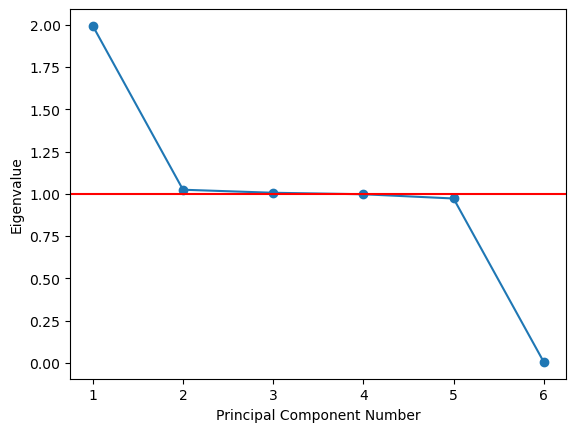

In [10]:
## D2 Total Number of PCs
# code adapted from K. Middleton's PCA Webinar

# Calculate covariance and vectors then define eigenvalues before creating scree plot

# Create a covariance matrix
cov_matrix = np.dot(cont_scaled.T, cont_scaled) / continuous_vars.shape[0]

# Create and store the eigenvectors in a new data frame
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plot eigenvalues
plt.plot(np.arange(1, len(eigenvalues)+1), eigenvalues, marker = 'o')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color="red")
plt.show()


In [11]:
eigen_table = pd.DataFrame({
    "Principal Component": [f"PC{i}" for i in range(1, len(eigenvalues) + 1)],
    "Eigenvalues": eigenvalues
})

print(eigen_table)

  Principal Component  Eigenvalues
0                 PC1     1.993190
1                 PC2     1.024347
2                 PC3     1.006403
3                 PC4     0.997597
4                 PC5     0.972532
5                 PC6     0.005930


### D3. Variance of each Principal Component

In [13]:
## D3 Variance of each Principal Component

final_pca = PCA(n_components = 3)

# Fit the PCA to the standardized data and transform
final_pca.fit(cont_scaled)
final_X_pca = final_pca.transform(cont_scaled)

# Generate PCA loadings for the final_pca
final_pca_loadings = pd.DataFrame(final_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3"], 
                              index = continuous_vars.columns)
final_pca_loadings


,PC1,PC2,PC3
Income,0.003928,-0.371380,-0.079329
Age,0.001961,0.103503,0.899687
Outage_sec_perweek,0.005843,0.657461,-0.380721
Tenure,0.705857,-0.039267,0.003119
MonthlyCharge,0.040767,0.646192,0.197816
Bandwidth_GB_Year,0.707142,-0.001714,-0.013426


In [14]:
## D3 Variance of each Principal Component

explained_variance = pca.explained_variance_ratio_

variance_table = pd.DataFrame({
    "Principal Component": [f"PC{i}" for i in range(1, len(explained_variance) + 1)],
    "Explained Variance Ratio": explained_variance
})

print(variance_table)

  Principal Component  Explained Variance Ratio
0                 PC1                  0.332198
1                 PC2                  0.170724
2                 PC3                  0.167734
3                 PC4                  0.166266
4                 PC5                  0.162089
5                 PC6                  0.000988


### D4. Total Variance Captured by Principal Components

As shown below, the three chosen Principal Components capture 67.07% of the total variance.

In [16]:
## D4 Total Variance Captured by Principal Components

n = 3

sum_explained_variance = variance_table["Explained Variance Ratio"].iloc[:n].sum()

print(f"Sum of explained variance ratio for the first {n} components: {sum_explained_variance:.4f}")

Sum of explained variance ratio for the first 3 components: 0.6707


### D5. Summary of Results of the Data Analysis
The analysis has shown that, based on the Kaiser rule for Principal Component Analysis, the number of principal components is three. Through dimensionality reduction, we can reduce the set of six continuous variables to three principal components that capture 67.07% of the variance in the data. This sufficiently answers the research question of whether or not it was possible to capture upwards of 80% of the total variance through dimensionality reduction, and it was not possible using only PCs with eigenvalues greater than or equal to 1. 

# Part V: Attachments
## E. Acknowledgement of Web Sources 
Middleton, K. *D206 - Getting Started with D206 | PCA* [Webinar]. Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3bcc452f-fa35-43be-b69f-b05901356f95  

## F. Acknowledgement of Sources

Middleton, K. *D206 - Getting Started with D206 | PCA* [Webinar]. Western Governors University. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3bcc452f-fa35-43be-b69f-b05901356f95  

Jaadi, Z. (2024, February 23). A Step by Step Explanation of Principal Component Analysis. Built In. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Keboola. (2022, April 2). A Guide to Principal Component Analysis (PCA) for Machine Learning. Www.keboola.com. https://www.keboola.com/blog/pca-machine-learning
